# Задание 1

In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [216]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [233]:
boston_data = load_boston()

dataset = pd.DataFrame(
    data = boston_data.data,
    columns = boston_data.feature_names
)

target = pd.DataFrame(
    data = boston_data.target,
    columns = ['house_price']
)

dtrain, dtest, ttrain, ttest = train_test_split(dataset, target, test_size=0.2, random_state=42)
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [218]:
scaler = StandardScaler()

dtrain_sc = scaler.fit_transform(dtrain)
dtest_sc = scaler.transform(dtest)

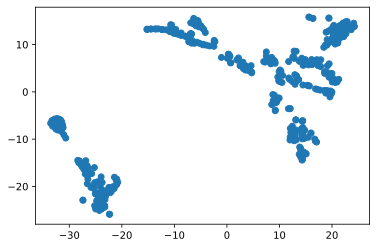

In [219]:
tTSNE = TSNE(
    n_components=2,
    learning_rate=250,
    random_state=42
)

tsne_res = tTSNE.fit_transform(dtrain)
plt.scatter(tsne_res[:, 0], tsne_res[:,1])
plt.show()

# Задание 2

In [220]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
clusters = model.fit_predict(dtrain)
clusters

array([1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [221]:
tsne_df = pd.DataFrame(
    data=tsne_res,
    columns=['s1', 's2']
).assign(cluster=clusters)

tsne_df.head()

,s1,s2,cluster
0,-26.976316,-17.329567,1
1,18.765280,9.916327,0
2,9.935251,4.253933,0
3,-31.970501,-5.753543,2
4,20.025152,11.331156,0


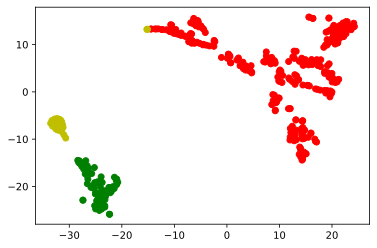

In [222]:
from itertools import cycle

colors = cycle(['r', 'g', 'y'])
c_u = np.unique(clusters)

for cluster in c_u:
    cluster_objects = tsne_df.loc[tsne_df['cluster'] == cluster, ['s1','s2']]
    plt.scatter(
        cluster_objects['s1'],
        cluster_objects['s2'],
        c=next(colors)
    )

plt.show()

In [223]:
dtrain = dtrain.assign(price=ttrain)
dtrain = dtrain.assign(cluster=clusters)
dtrain.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,cluster
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9,0
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4,0
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4,2
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2,0


In [231]:
df = pd.DataFrame(columns=c_u, index=['price', 'CRIM'])

for cluster in c_u:
    df.loc['price', cluster] = dtrain.loc[dtrain['cluster']==cluster,'price'].mean()
    df.loc['CRIM', cluster] = dtrain.loc[dtrain['cluster']==cluster,'CRIM'].mean()

df

,0,1,2
price,25.168687,17.442105,13.196774
CRIM,0.404863,11.745662,14.36038


# Задание 3

In [225]:
predict_res = model.predict(dtest)

In [228]:
dtest = dtest.assign(price=ttest)
dtest = dtest.assign(cluster=predict_res)

In [232]:
df = pd.DataFrame(columns=np.unique(predict_res), index=['price', 'CRIM'])

for cluster in np.unique(predict_res):
    df.loc['price', cluster] = dtest.loc[dtest['cluster']==cluster,'price'].mean()
    df.loc['CRIM', cluster] = dtest.loc[dtest['cluster']==cluster,'CRIM'].mean()

df

,0,1,2
price,23.911594,17.392308,12.814286
CRIM,0.246421,8.469302,19.021666
